In [21]:
import numpy as np
import pandas as pd
import yfinance as yf
from tabulate import tabulate
import scipy

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn

from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

VARIANCE - COVARIANCE APPROACH

In [27]:
df = yf.download("SBIN.BO", "2023-01-01","2023-12-31")
df = df[['Close']]
df['returns'] = df.Close.pct_change()

[*********************100%%**********************]  1 of 1 completed


In [28]:
df['returns']

Date
2023-01-02         NaN
2023-01-03    0.000163
2023-01-04   -0.011595
2023-01-05   -0.000083
2023-01-06   -0.007601
                ...   
2023-12-22   -0.011260
2023-12-26    0.002042
2023-12-27    0.016302
2023-12-28    0.004242
2023-12-29   -0.014053
Name: returns, Length: 230, dtype: float64

In [29]:
mean = np.mean(df['returns'])
std_dev = np.std(df['returns'])

In [30]:
mean

0.00030511523221229443

In [33]:
std_dev

0.01399515275901563

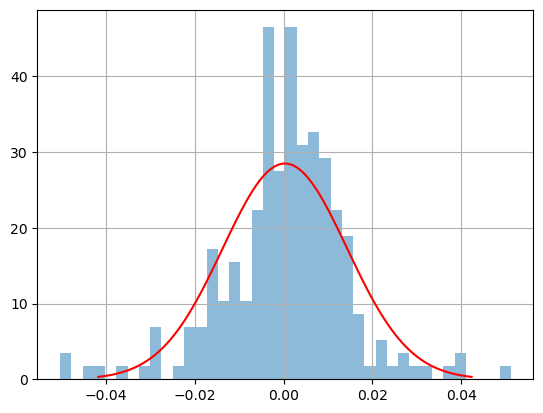

In [34]:
df['returns'].hist(bins=40, density=True, histtype='stepfilled', alpha=0.5)

x = np.linspace(mean - 3*std_dev, mean + 3*std_dev,100)
plt.plot(x, scipy.stats.norm.pdf (x,mean,std_dev), "r")
plt.show()

In [39]:
VaR_90 = norm.ppf(0.1, mean, std_dev)
VaR_95 = norm.ppf(0.05, mean, std_dev)
VaR_99 = norm.ppf(0.01, mean, std_dev)
print (tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers = ['Confidence Level', 'Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0176304
95%                      -0.0227149
99%                      -0.0322525


HISTORICAL SIMULATION APPROACH

In [47]:
df = yf.download("SBIN.BO", "2023-01-01","2023-12-31")
df = df[['Close']]
df['returns'] = df.Close.pct_change()

[*********************100%%**********************]  1 of 1 completed


In [50]:
df['returns']

Date
2023-01-02         NaN
2023-01-03    0.000163
2023-01-04   -0.011595
2023-01-05   -0.000083
2023-01-06   -0.007601
                ...   
2023-12-22   -0.011260
2023-12-26    0.002042
2023-12-27    0.016302
2023-12-28    0.004242
2023-12-29   -0.014053
Name: returns, Length: 230, dtype: float64

In [54]:
df['returns'] = df['returns'].dropna()
df['returns'].dropna()

Date
2023-01-03    0.000163
2023-01-04   -0.011595
2023-01-05   -0.000083
2023-01-06   -0.007601
2023-01-09    0.012071
                ...   
2023-12-22   -0.011260
2023-12-26    0.002042
2023-12-27    0.016302
2023-12-28    0.004242
2023-12-29   -0.014053
Name: returns, Length: 229, dtype: float64

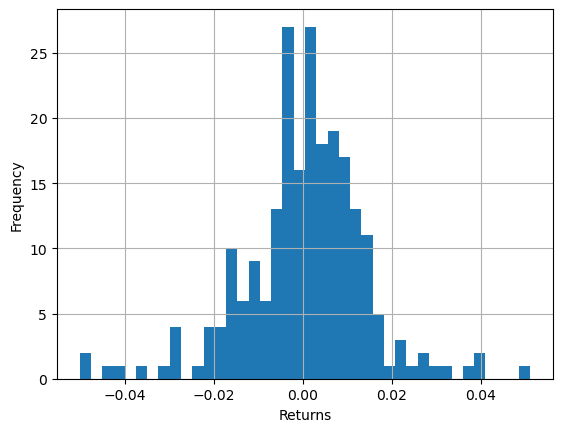

In [55]:
plt.hist(df.returns, bins = 40)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [57]:
VaR_90 = df['returns'].quantile(0.1)
VaR_95 = df['returns'].quantile(0.05)
VaR_99 = df['returns'].quantile(0.01)
print (tabulate([['90%',VaR_90], ['95%',VaR_95], ['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0168329
95%                      -0.0212056
99%                      -0.0425187
